<a href="https://colab.research.google.com/github/Chang365/ESAA-25-1-assignments/blob/main/ESAA_25_1_0905_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 핸즈온 p.184-203
## 4.5 규제가 있는 선형 모델

- 자유도를 줄이면 데이터에 과대적합되기 더 어려워짐
- 다항 회귀 모델을 규제하는 간단한 방법은 다항식의 차수를 감소시키는 것
- 선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가함
- 릿지 회귀, 라쏘 회귀, 엘라스틱넷

### 4.5.1 릿지 회귀 (티호노프 규제)
- 모델의 가중치가 가능한 작게 유지되도록
- 규제항은 훈련하는 동안에만 비용 함수 -> 끝나면 성능 지표
- 하이퍼파라미터 '알파'는 모델을 얼마나 많이 규제할지 조절, 0이면 릿지회귀는 선형회귀와 같아짐, 알파가 아주 크면 모든 가중치가 거의 0에 가까워지고 수평선이 됨
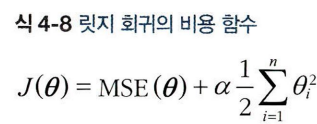




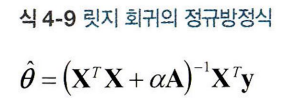

In [2]:
import numpy as np
import matplotlib.pyplot as plt

m = 100

X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [3]:
# 사이킷런에서 정규방정식을 사용한 릿지 회귀를 적용하는 예

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([4.46863396])

In [4]:
# 확률적 경사 하강법을 사용했을 때

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2") #l2는 SGD가 비용 함수에 가중치 벡터의 노름의 제곱을 2로 나눈 규제항을 추가하게 만듦.
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.46038951])

### 4.5.2 라쏘 회귀


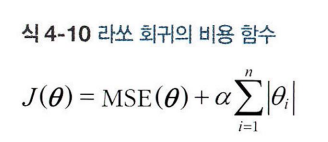

- 덜 중요한 특성의 가중치를 제거하려고 함
- 자동으로 특성 선택을 하고 희소 모델을 만듦

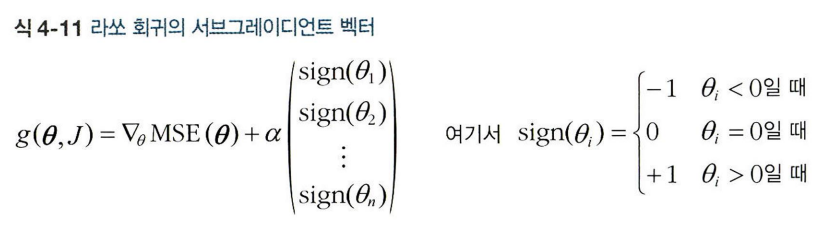

In [5]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.41235739])

### 4.5.3 엘라스틱넷

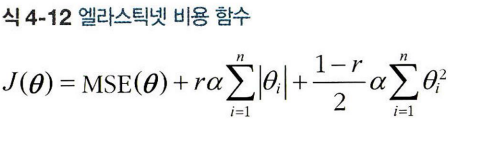

In [6]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.41784342])

### 4.5.4 조기 종료
- 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것

In [7]:
from sklearn.base import clone
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

In [8]:
# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

## 4.6 로지스틱 회귀
- 양성 클래스, 음성 클래스

### 4.6.1 확률 추정
- 로지스틱 회귀 모델은 선형 회귀 모델과 같이 입력 특성의 가중치 합을 계산함

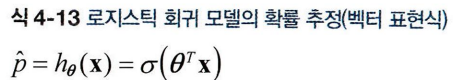

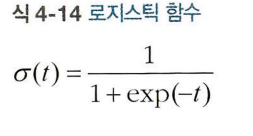

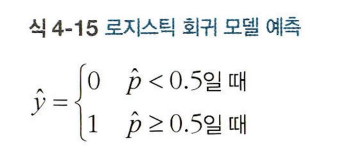

### 4.6.2 훈련과 비용수
- 련의 목적은 양성 샘플(y=1)에 대해서는 높은 확률을 추정하고 음성 샘플(y=0)
에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 를 찾는 것

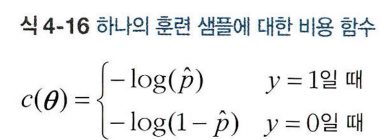

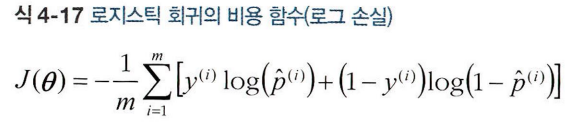

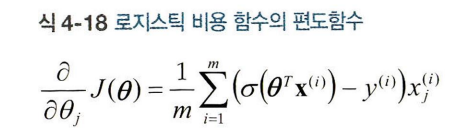

### 4.6.3 결정 경계

In [15]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, 3:] #꽃잎의 너비
y = (iris["target"] == 2).astype(int).ravel() #1 Iris-Virginica면 1, 그렇지 않으면 0

In [16]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

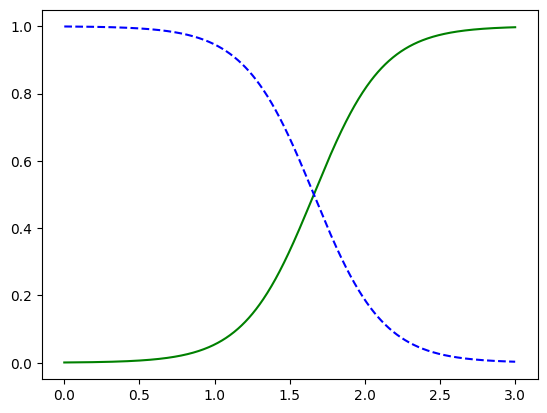

In [17]:
## 꽃잎 너비 0~3cm인 꽃에 대한 모델 추정 확률
import matplotlib.pyplot as plt
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],"g-", label='Iris virginica')
plt.plot(X_new, y_proba[:,0],"b--", label="not Iris virginica")

In [18]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

### 4.6.4 소프트맥스 회귀

- 소프트맥스/다항로지스틱 회귀: 여러개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있음

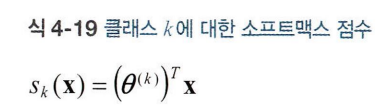

- 각 클래스는 자신만의 파라미터 벡터가 있고 이를 파라미터 행렬에 행으로 저장
- 샘플 x에 대해 각 클래스의 점수가 계산되면 소프트맥스 함수를 통과시켜 클래스 k에 속할 확률 p을 추정할 수 있음

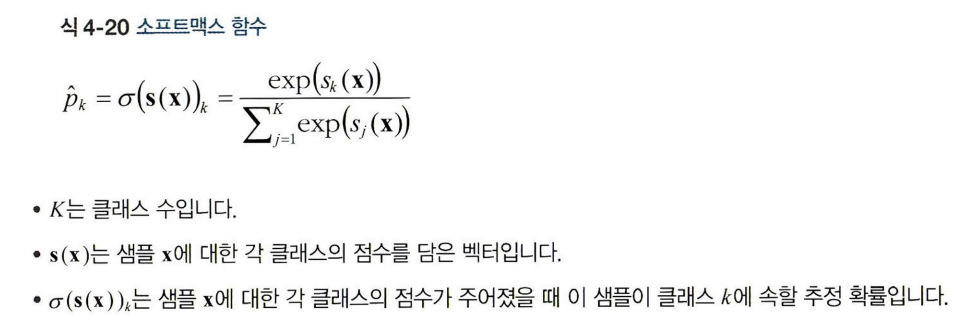

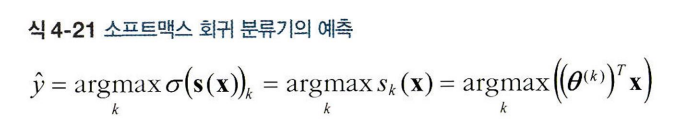

- 크로스 엔트로피cross entropy 비용 함수를 최소화하는 것은 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제

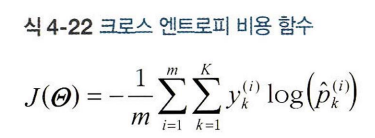

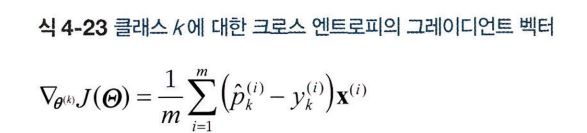

In [20]:
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

softmax_reg.predict([[5, 2]])

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


array([2])

In [21]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626374e-07, 5.73689802e-02, 9.42630398e-01]])